In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

plt.style.use('seaborn') #matplot 스타일을 seaborn 으로 사용
sns.set(font_scale=2.5)

import missingno as msno #데이터셋의 null데이터를 보여주는 라이브러리

#ignore warnings
import warnings
warnings.filterwarnings('ignore') # warning 무시

%matplotlib inline #노트북에 바로바로 볼수 있게 함

UsageError: unrecognized arguments: #노트북에 바로바로 볼수 있게 함


In [3]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [4]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_train.shape

(891, 12)

In [7]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
for col in df_train.columns:
    msg = 'column: {:10}\t Percent of NaN value: {:.2f}%'.format(col,100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column: Survived  	 Percent of NaN value: 0.00%
column: Pclass    	 Percent of NaN value: 0.00%
column: Name      	 Percent of NaN value: 0.00%
column: Sex       	 Percent of NaN value: 0.00%
column: Age       	 Percent of NaN value: 19.87%
column: SibSp     	 Percent of NaN value: 0.00%
column: Parch     	 Percent of NaN value: 0.00%
column: Ticket    	 Percent of NaN value: 0.00%
column: Fare      	 Percent of NaN value: 0.00%
column: Cabin     	 Percent of NaN value: 77.10%
column: Embarked  	 Percent of NaN value: 0.22%


In [11]:
type(df_train[col]) #Series 는 컬럼과 value로 이루어져 있음

pandas.core.series.Series

In [12]:
df_train[col].isnull().sum() #널데이터가 2개가 있음

2

In [13]:
df_train[col].isnull().sum() / df_train[col].shape[0]

0.002244668911335578

In [14]:
df_train[col].shape

(891,)

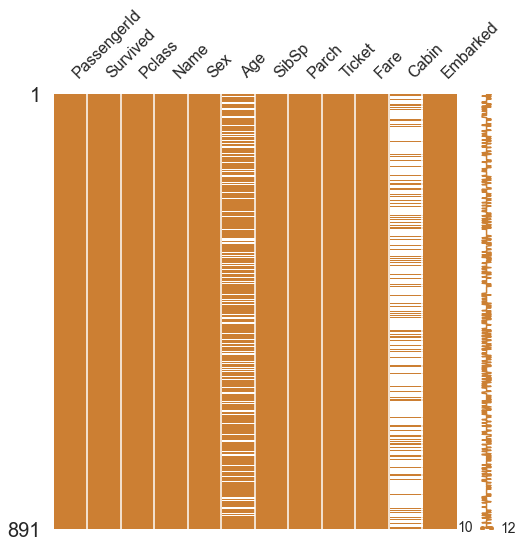

In [15]:
msno.matrix(df=df_train.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))

In [16]:
df_train.iloc[:,:2]

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
886,887,0
887,888,1
888,889,0
889,890,1


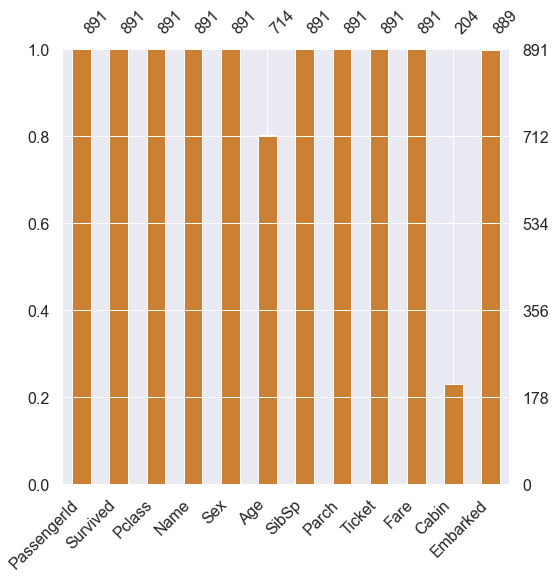

In [17]:
msno.bar(df=df_train.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))

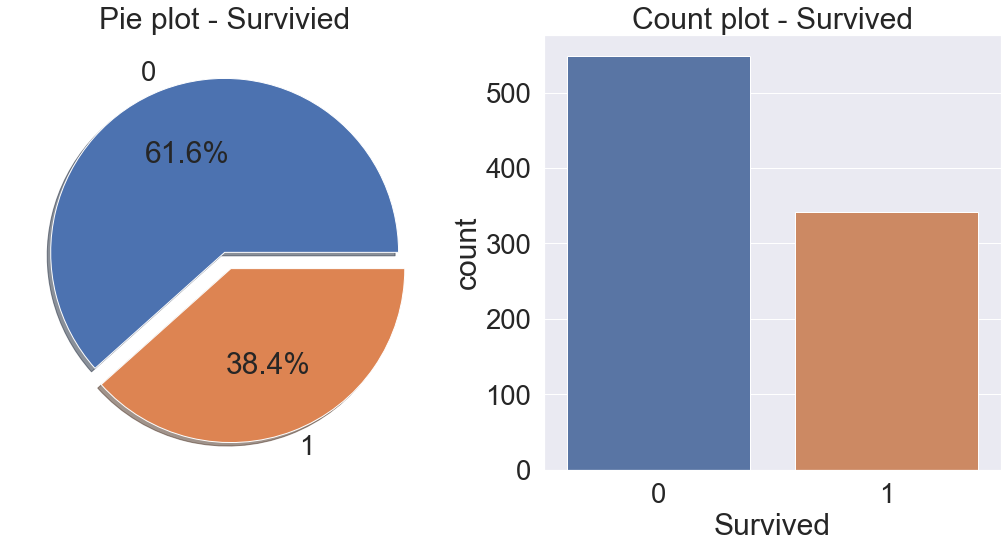

In [18]:
f, ax = plt.subplots(1,2,figsize=(18,8)) #1개의 행과 2개의 열로 이루어진 subplot 크기 (18,8)

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
# explode는 크기를 늘리는거 autopct는 퍼센트의 형식 나타냄, ax[0]는 첫번째에 그리겠다.
ax[0].set_title('Pie plot - Survivied')
ax[0].set_ylabel('') #y축 레이블 없음
sns.countplot('Survived',data=df_train,ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

In [19]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# 2.EDA

2.1 Pclass

In [20]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [21]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [22]:
df_train[['Pclass','Survived']].groupby(['Pclass']).count() # count()는 객체가 몇명 sum()은 생존자가 몇명

,Survived
Pclass,
1,216
2,184
3,491


In [23]:
df_train['Survived'].unique()

array([0, 1], dtype=int64)

In [24]:
pd.crosstab(df_train['Pclass'],df_train['Survived'],margins=True).style.background_gradient(cmap='summer_r') #color map scheme

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


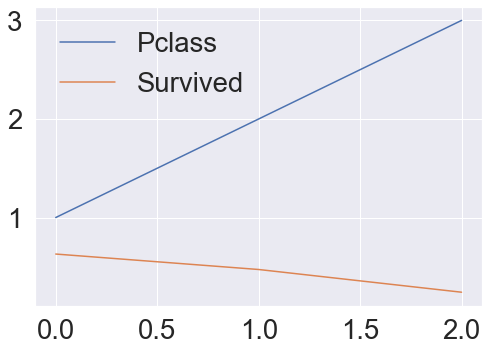

In [25]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False).plot()

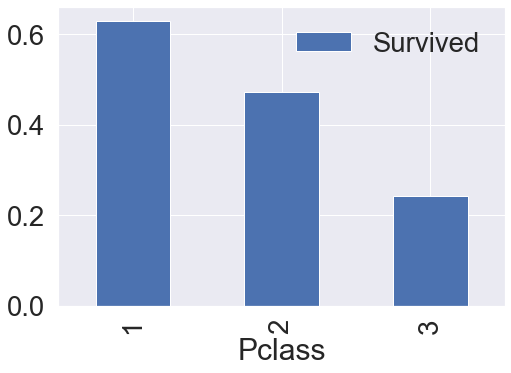

In [26]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar()

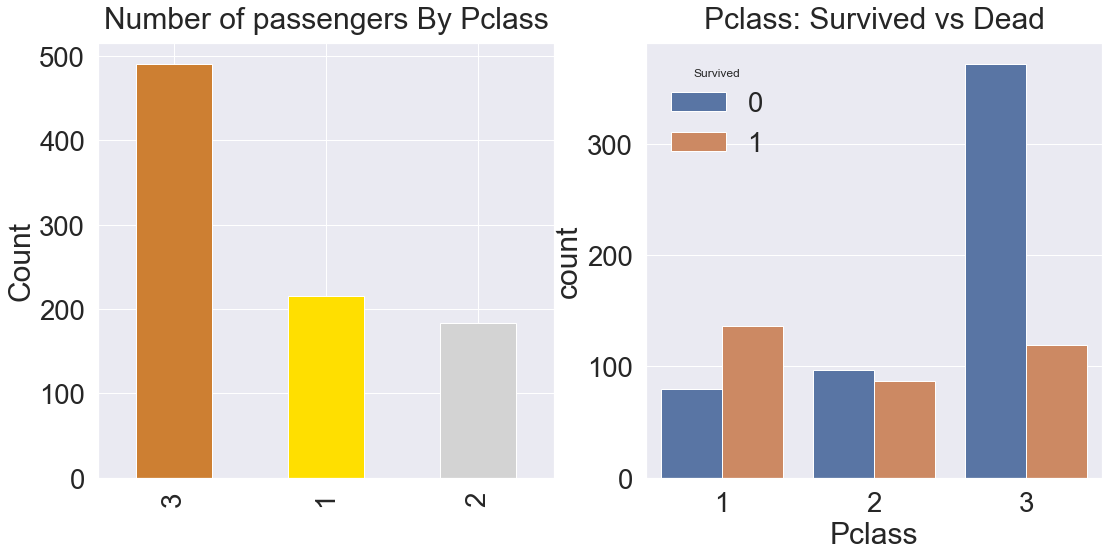

In [27]:
y_position=1.02
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of passengers By Pclass',y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=df_train,ax=ax[1]) # hue 색깔 별로 구분해서 표현
ax[1].set_title('Pclass: Survived vs Dead',y=y_position)
plt.show()

2.2 Sex

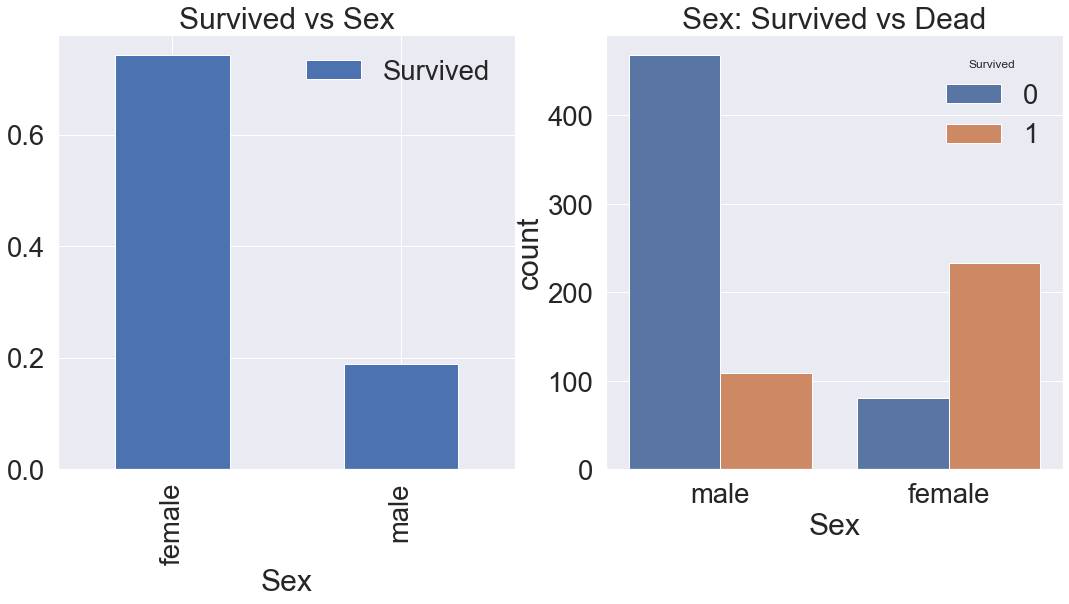

In [28]:
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'],as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [29]:
df_train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [30]:
pd.crosstab(df_train['Sex'],df_train['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


2.2 Both Sex and Pclass

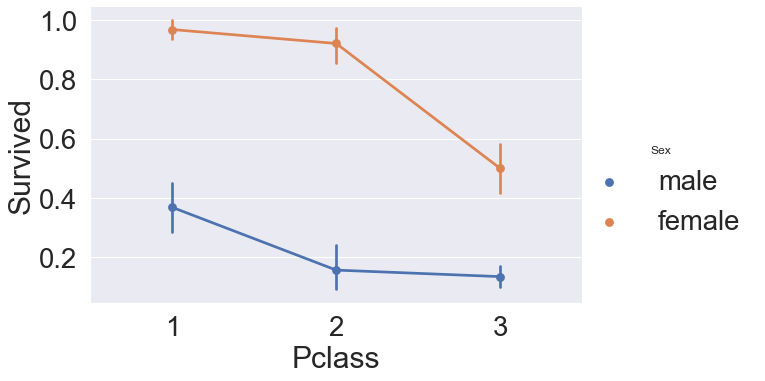

In [31]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train,size=6,aspect=1.5)

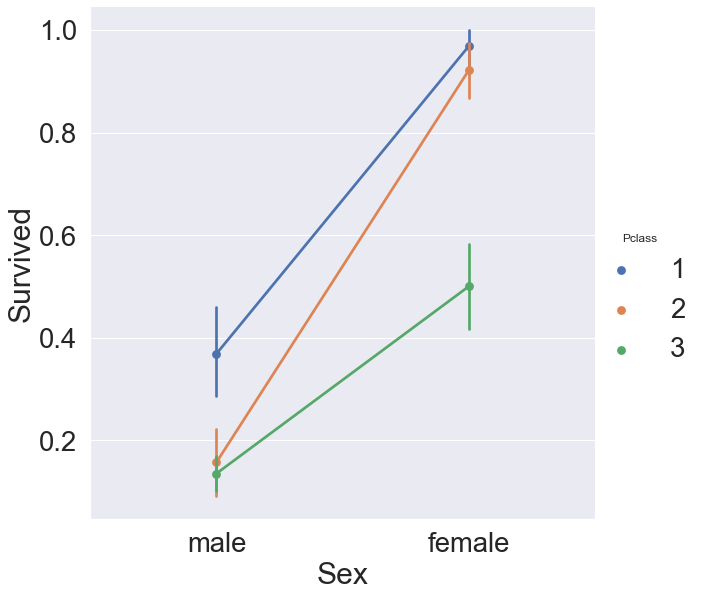

In [32]:
sns.factorplot(x='Sex',y='Survived',hue='Pclass',data=df_train,saturation=.5,size=9,aspect=1) #맨끝 작대기(error bar)는 얼마나 신뢰도가 높은지 작을수록 높음

Age

In [33]:
print('제일 나이 많은 탐승객 : {:.1f} years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} years'.format(df_train['Age'].mean()))

제일 나이 많은 탐승객 : 80.0 years
제일 어린 탑승객 : 0.4 years
탑승객 평균 나이 : 29.7 years


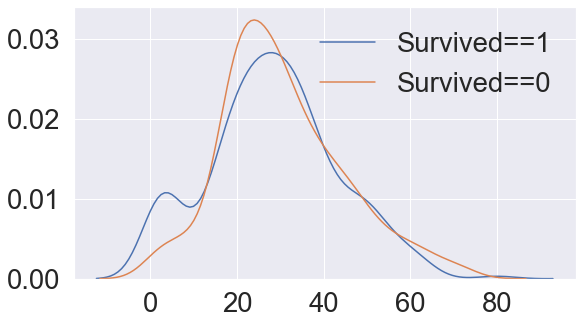

In [34]:
fig, ax=plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'],ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'],ax=ax)
plt.legend(['Survived==1','Survived==0'])
plt.show()

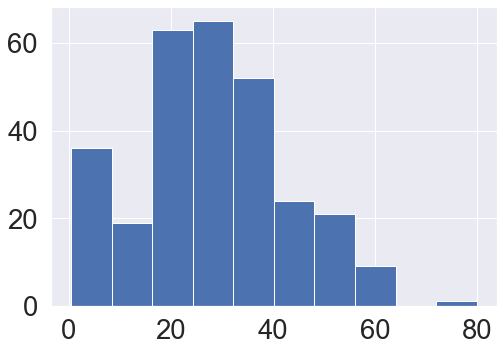

In [35]:
df_train[df_train['Survived']==1]['Age'].hist()

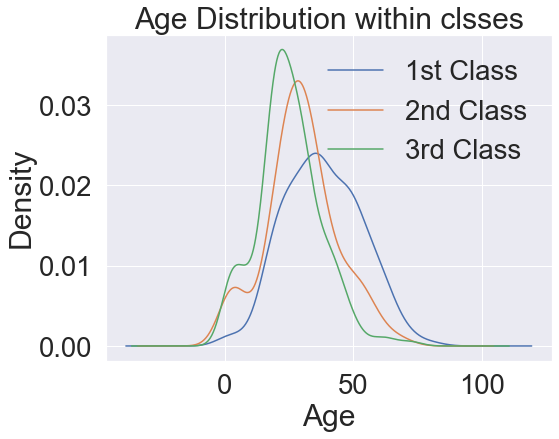

In [36]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within clsses')
plt.legend(['1st Class','2nd Class','3rd Class'])

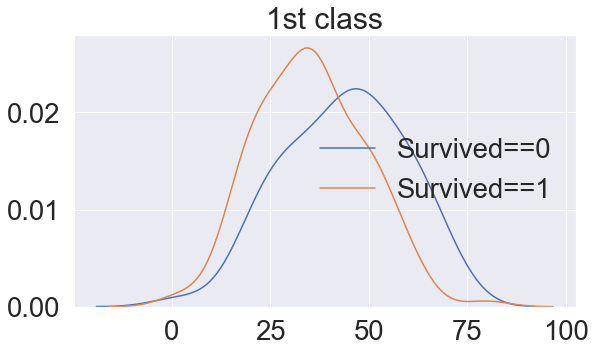

In [37]:
fig, ax=plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived']==0)& (df_train['Pclass']==1)]['Age'],ax=ax)
sns.kdeplot(df_train[(df_train['Survived']==1)& (df_train['Pclass']==1)]['Age'],ax=ax)
plt.legend(['Survived==0','Survived==1'])
plt.title('1st class')
plt.show()

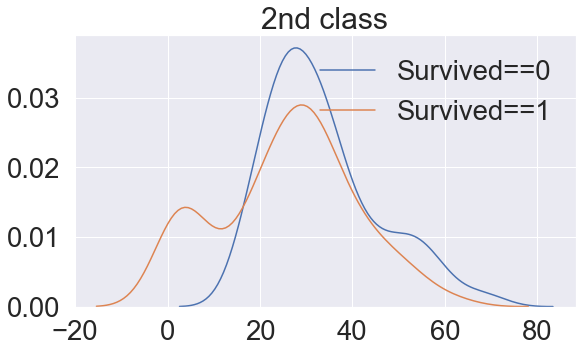

In [38]:
fig, ax=plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived']==0)& (df_train['Pclass']==2)]['Age'],ax=ax)
sns.kdeplot(df_train[(df_train['Survived']==1)& (df_train['Pclass']==2)]['Age'],ax=ax)
plt.legend(['Survived==0','Survived==1'])
plt.title('2nd class')
plt.show() #나이에 -인 이유는 추정식이라 fitting 되서 (근사치를 구하는것)

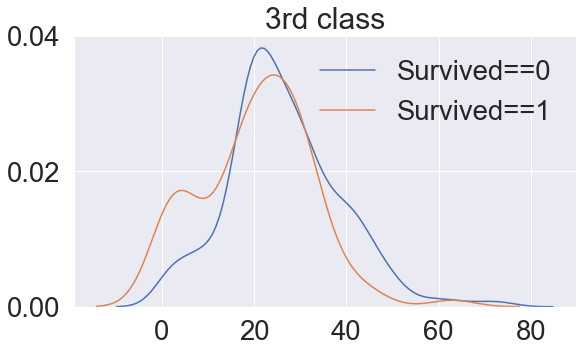

In [39]:
fig, ax=plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived']==0)& (df_train['Pclass']==3)]['Age'],ax=ax)
sns.kdeplot(df_train[(df_train['Survived']==1)& (df_train['Pclass']==3)]['Age'],ax=ax)
plt.legend(['Survived==0','Survived==1'])
plt.title('3rd class')
plt.show()

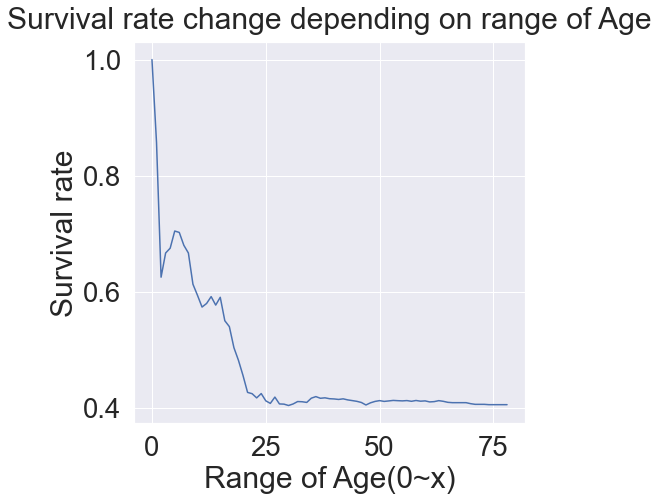

In [40]:
change_age_range_survival_ratio=[]

for i in range(1,80):
    change_age_range_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived']))
    
plt.figure(figsize=(7,7))
plt.plot(change_age_range_survival_ratio)
plt.title('Survival rate change depending on range of Age',y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

In [41]:
i=10
df_train[df_train['Age']<i]['Survived'].sum() / len(df_train[df_train['Age']<i]['Survived'])

0.6129032258064516

In [42]:
df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived'])

0.6129032258064516

In [43]:
len(df_train[df_train['Age']<i]['Survived'])

62

 Pclass, Sex, Age

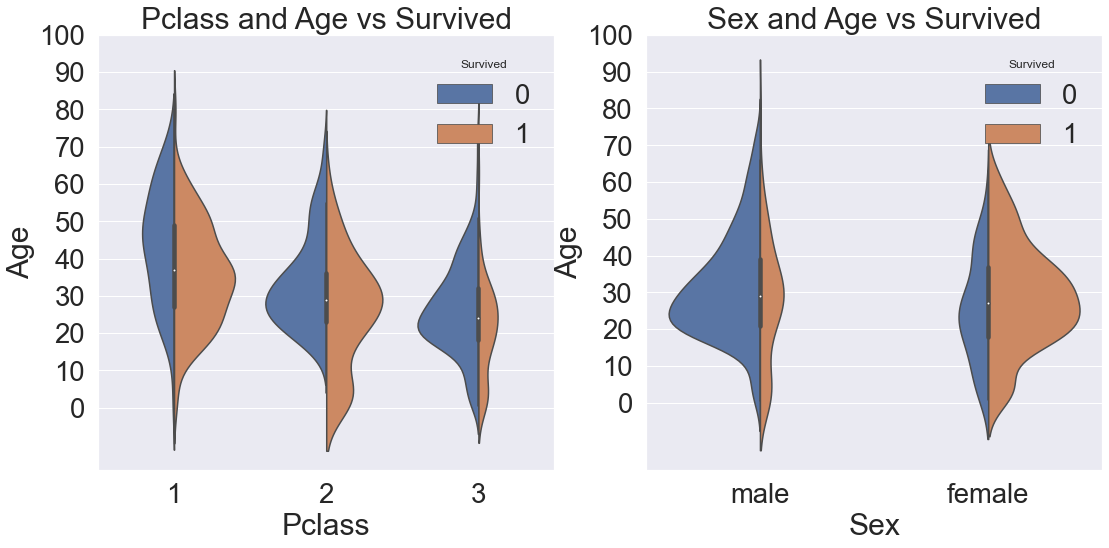

In [44]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',data=df_train,scale='count',split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex','Age',hue='Survived',data=df_train,scale='count',split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

Embarked

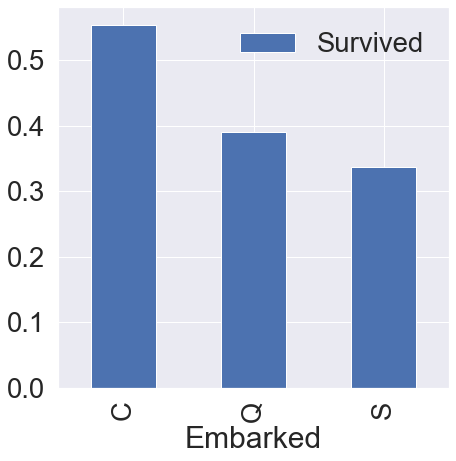

In [45]:
f, ax=plt.subplots(1,1,figsize=(7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax)

In [46]:
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().sort_values(by='Survived',ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [47]:
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().sort_index()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


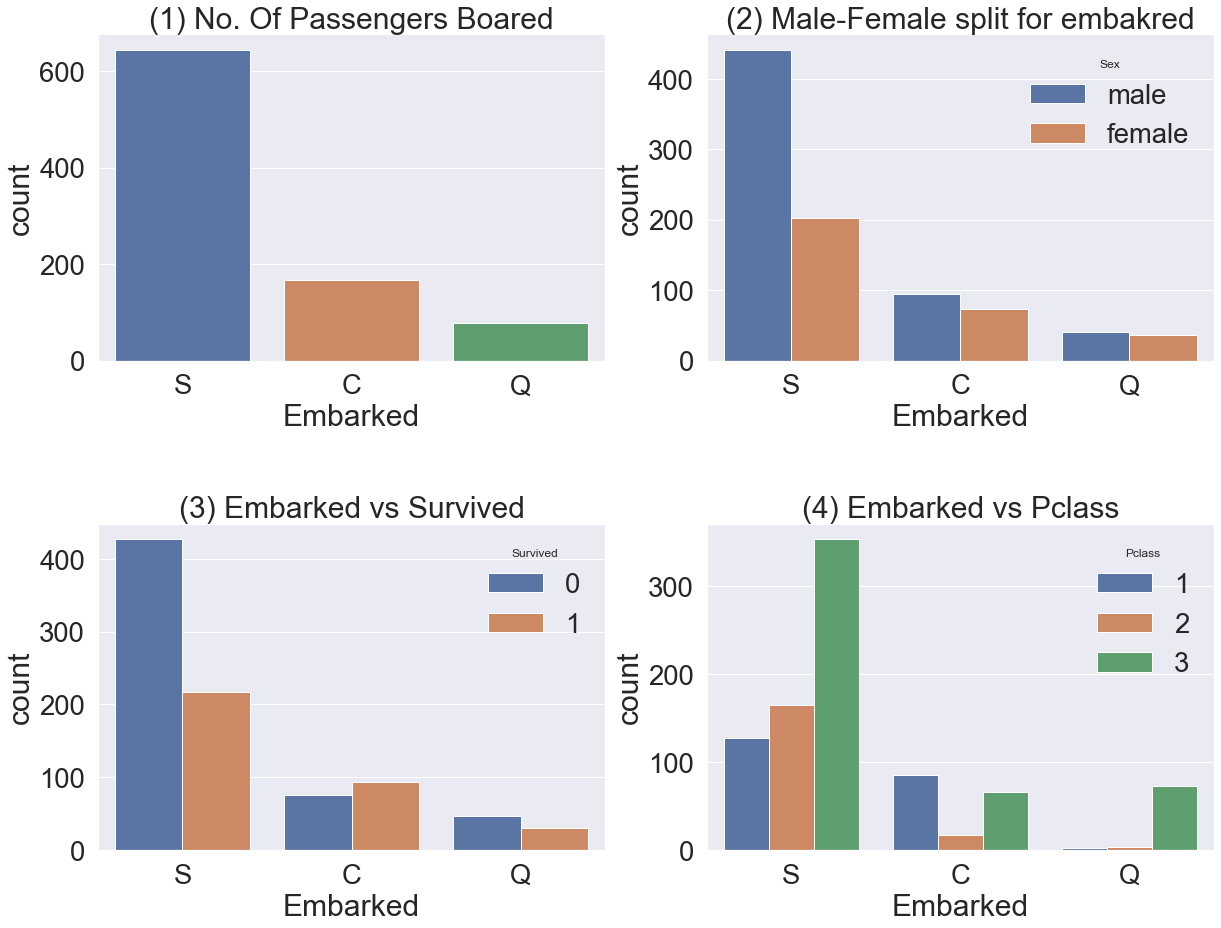

In [48]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=df_train,ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boared')

sns.countplot('Embarked',hue='Sex',data=df_train,ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female split for embakred')

sns.countplot('Embarked',hue='Survived',data=df_train,ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked',hue='Pclass',data=df_train,ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

Family= SibSp +Parch

In [49]:
df_train['FamilySize']=df_train['SibSp']+df_train['Parch']+1
df_test['FamilySize']=df_test['SibSp']+df_test['Parch']+1

In [50]:
print('Maximum size of Family: ',df_train['FamilySize'].max())
print('Minimum size of Family: ',df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


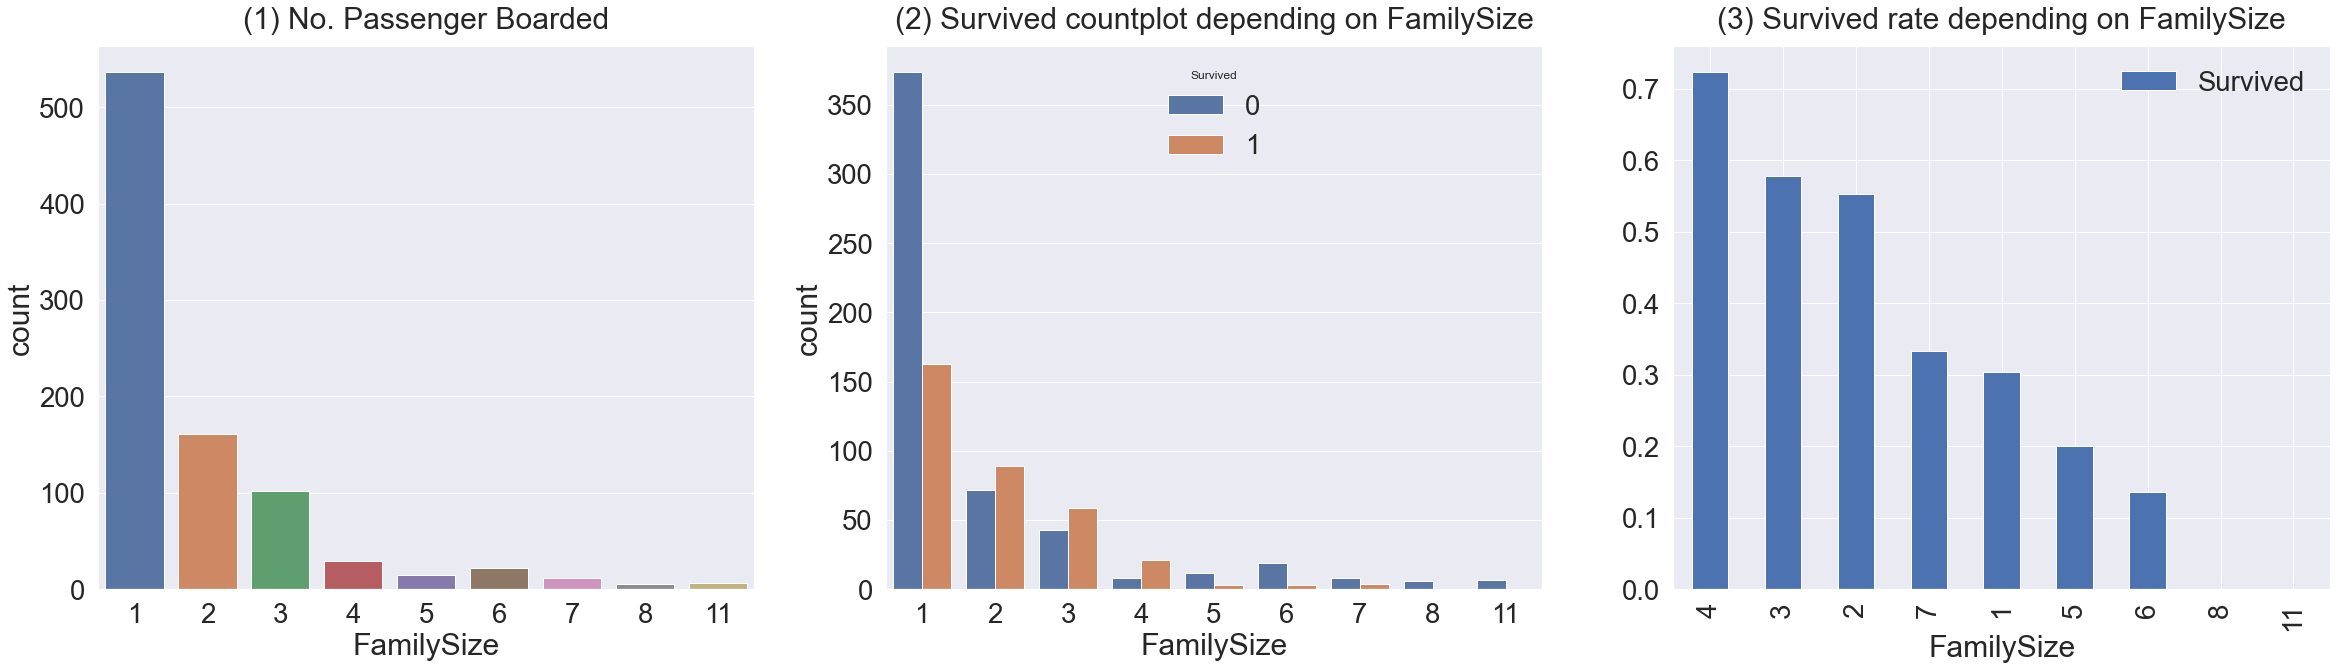

In [51]:
f, ax =plt.subplots(1,3,figsize=(40,10))
sns.countplot('FamilySize',data=df_train,ax=ax[0])
ax[0].set_title('(1) No. Passenger Boarded',y=1.02)

sns.countplot('FamilySize',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize','Survived']].groupby(['FamilySize'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',y=1.02)

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

Fare

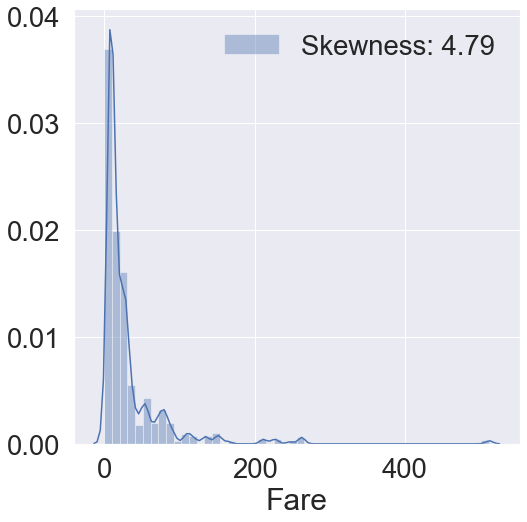

In [52]:
fig, ax=plt.subplots(1,1,figsize=(8,8))
g=sns.distplot(df_train['Fare'],color='b',label='Skewness: {:.2f}'.format(df_train['Fare'].skew()),ax=ax)
g=g.legend(loc='best')

In [53]:
df_train['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [54]:
df_train['Fare']=df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0) #로그함수 취함,피처 엔지니어링 작업=>모델의 성능을 좋게하기 위해

In [55]:
df_train['Fare']

0      1.981001
1      4.266662
2      2.070022
3      3.972177
4      2.085672
         ...   
886    2.564949
887    3.401197
888    3.154870
889    3.401197
890    2.047693
Name: Fare, Length: 891, dtype: float64

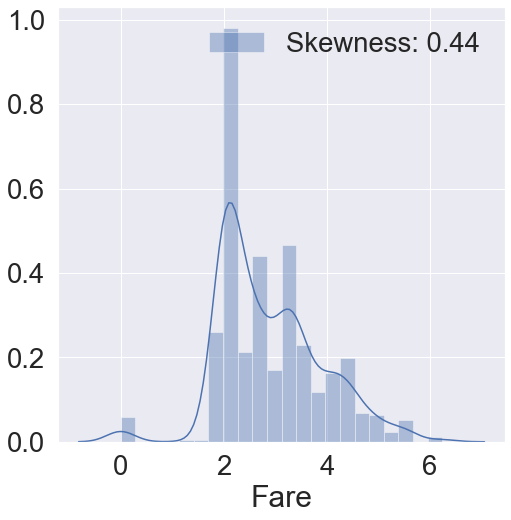

In [56]:
fig, ax=plt.subplots(1,1,figsize=(8,8))
g=sns.distplot(df_train['Fare'],color='b',label='Skewness: {:.2f}'.format(df_train['Fare'].skew()),ax=ax)
g=g.legend(loc='best')

Ticket ,Cabin은 null값이 많아서 뺌

In [57]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
CA 2144     6
3101295     6
           ..
19972       1
36864       1
370377      1
11753       1
330877      1
Name: Ticket, Length: 681, dtype: int64

Feature Engineering

In [58]:
df_train['Age'].isnull().sum()

177

In [59]:
df_train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [60]:
df_train['Name'].str #string 데이터 타입으로 변환

In [61]:
df_train['initial']=df_train['Name'].str.extract('([A-Za-z]+)\.') #A-Za-z까지 .이 들어간 것을 추출하겠다
df_test['initial']=df_test['Name'].str.extract('([A-Za-z]+)\.') #A-Za-z까지 .이 들어간 것을 추출하겠다

In [62]:
pd.crosstab(df_train['initial'],df_train['Sex']).T.style.background_gradient(cmap='summer_r')

initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [63]:
df_train['initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                           ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'],inplace=True)

df_test['initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                           ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'],inplace=True)

In [64]:
df_train.groupby('initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


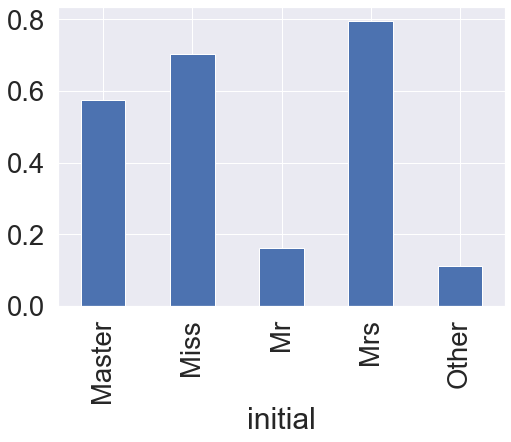

In [65]:
df_train.groupby('initial')['Survived'].mean().plot.bar()

In [66]:
df_all=pd.concat([df_train,df_test])  #train,test 합치기
df_all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,initial
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.050000,NaN,S,1,Mr
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.900000,C105,C,1,Mr
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.250000,NaN,S,1,Mr
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.050000,NaN,S,1,Mr


In [67]:
df_all.shape

(1309, 14)

In [68]:
df_all.groupby('initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
initial,,,,,,,,
Master,658.852459,0.575000,2.655738,5.482642,2.049180,1.377049,15.442677,4.426230
Miss,616.992453,0.704301,2.332075,21.834533,0.652830,0.494340,14.021188,2.147170
Mr,658.831388,0.162571,2.359274,32.556397,0.286641,0.159533,10.003941,1.446174
Mrs,685.673367,0.795276,1.929648,37.034884,0.658291,0.824121,23.896996,2.482412
Other,714.923077,0.111111,1.615385,44.923077,0.230769,0.153846,24.523034,1.384615


In [69]:
df_train.loc[(df_train['Age'].isnull())&(df_train['initial']=='Mr'),'Age']=33 #평균값으로 채우기
df_train.loc[(df_train['Age'].isnull())&(df_train['initial']=='Mrs'),'Age']=37
df_train.loc[(df_train['Age'].isnull())&(df_train['initial']=='Master'),'Age']=5
df_train.loc[(df_train['Age'].isnull())&(df_train['initial']=='Miss'),'Age']=22
df_train.loc[(df_train['Age'].isnull())&(df_train['initial']=='Other'),'Age']=45

df_test.loc[(df_test['Age'].isnull())&(df_test['initial']=='Mr'),'Age']=33 #평균값으로 채우기
df_test.loc[(df_test['Age'].isnull())&(df_test['initial']=='Mrs'),'Age']=37
df_test.loc[(df_test['Age'].isnull())&(df_test['initial']=='Master'),'Age']=5
df_test.loc[(df_test['Age'].isnull())&(df_test['initial']=='Miss'),'Age']=22
df_test.loc[(df_test['Age'].isnull())&(df_test['initial']=='Other'),'Age']=45

In [70]:
df_train['Age'].isnull().sum()

0

In [71]:
df_test['Age'].isnull().sum()

0

In [72]:
df_train.loc[df_train['Survived']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,initial
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,2.409941,NaN,S,3,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,3.403555,NaN,C,2,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,1.977547,NaN,C,1,Miss
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,4.420746,C50,C,2,Mrs
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,3.258097,NaN,S,2,Mrs
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,3.401197,B42,S,1,Miss


In [73]:
df_train['Embarked'].isnull().sum()

2

In [74]:
df_train.shape

(891, 14)

In [75]:
df_train['Embarked'].fillna('S',inplace=True)  #가장 많은 것으로 치환

In [76]:
df_train['Embarked'].isnull().sum()

0

In [77]:
df_train['Age_cat']=0

In [78]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,0


In [79]:
#하드 코딩 사용
df_train.loc[df_train['Age']<10,'Age_cat']=0
df_train.loc[(10 <= df_train['Age'])&(df_train['Age']<20),'Age_cat']=1
df_train.loc[(20 <= df_train['Age'])&(df_train['Age']<30),'Age_cat']=2
df_train.loc[(30 <= df_train['Age'])&(df_train['Age']<40),'Age_cat']=3
df_train.loc[(40 <= df_train['Age'])&(df_train['Age']<50),'Age_cat']=4
df_train.loc[(50 <= df_train['Age'])&(df_train['Age']<60),'Age_cat']=5
df_train.loc[(60 <= df_train['Age'])&(df_train['Age']<70),'Age_cat']=6
df_train.loc[ 70 <= df_train['Age'],'Age_cat']=7


df_test.loc[df_test['Age']<10,'Age_cat']=0
df_test.loc[(10 <= df_test['Age'])&(df_test['Age']<20),'Age_cat']=1
df_test.loc[(20 <= df_test['Age'])&(df_test['Age']<30),'Age_cat']=2
df_test.loc[(30 <= df_test['Age'])&(df_test['Age']<40),'Age_cat']=3
df_test.loc[(40 <= df_test['Age'])&(df_test['Age']<50),'Age_cat']=4
df_test.loc[(50 <= df_test['Age'])&(df_test['Age']<60),'Age_cat']=5
df_test.loc[(60 <= df_test['Age'])&(df_test['Age']<70),'Age_cat']=6
df_test.loc[ 70 <= df_test['Age'],'Age_cat']=7

In [80]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,3


In [81]:
def category_age(x):
    if x<10:
        return 0
    elif x<20:
        return 1
    elif x<30:
        return 2
    elif x<40:
        return 3
    elif x<50:
        return 4
    elif x<60:
        return 5
    elif x<70:
        return 6
    else:
        return 7

In [82]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,3


In [83]:
df_train['Age_cat_2']=df_train['Age'].apply(category_age)

In [84]:
(df_train['Age_cat']==df_train['Age_cat_2']).any()

True

In [85]:
df_train.drop(['Age','Age_cat_2'],axis=1,inplace=True)
df_test.drop(['Age'],axis=1,inplace=True)

In [86]:
df_train.initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [87]:
df_train['initial']=df_train['initial'].map({'Master':0,'Miss':1,'Mr':2,'Mrs':3,'Other':4})
df_test['initial']=df_test['initial'].map({'Master':0,'Miss':1,'Mr':2,'Mrs':3,'Other':4})

In [88]:
df_train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [89]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [90]:
df_train['Embarked']=df_train['Embarked'].map({'C':0,'Q':1,'S':2})
df_test['Embarked']=df_test['Embarked'].map({'C':0,'Q':1,'S':2})

In [91]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,4.266662,C85,0,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,3.972177,C123,2,2,3,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,2.085672,NaN,2,1,2,3


In [92]:
df_train.Embarked.isnull().sum()

0

In [93]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [94]:
df_train['Sex']=df_train['Sex'].map({'female':0,'male':1})
df_test['Sex']=df_test['Sex'].map({'female':0,'male':1})

In [95]:
heatmap_data=df_train[['Survived','Pclass','Sex','Fare','Embarked','FamilySize','initial','Age_cat']]

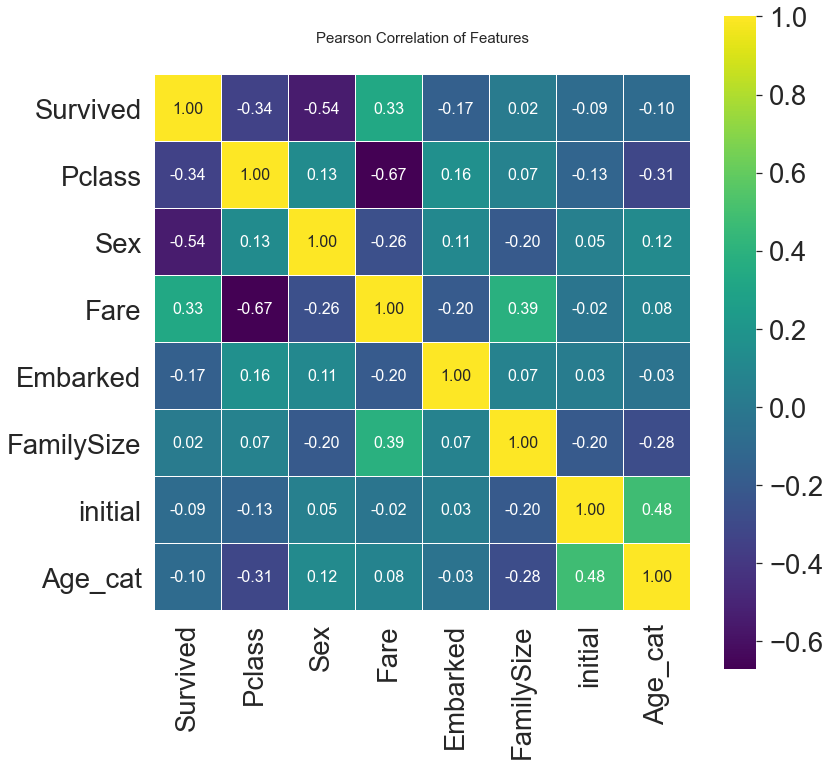

In [96]:
colormap=plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features',y=1.05,size=15)
sns.heatmap(heatmap_data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,linecolor='white',annot=True,annot_kws={'size':16},fmt='.2f')

One-hot encoding

In [97]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,3
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,2,3


In [98]:
df_train=pd.get_dummies(df_train,columns=['initial'],prefix='initial')
df_test=pd.get_dummies(df_test,columns=['initial'],prefix='initial')

In [99]:
df_train=pd.get_dummies(df_train,columns=['Embarked'],prefix='Embarked')
df_test=pd.get_dummies(df_test,columns=['Embarked'],prefix='Embarked')

In [100]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,initial_0,initial_1,initial_2,initial_3,initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,2,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,1,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,1,3,0,0,1,0,0,0,0,1


In [101]:
df_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)
df_test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)

In [102]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,initial_0,initial_1,initial_2,initial_3,initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [103]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,initial_0,initial_1,initial_2,initial_3,initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,7.8292,1,3.0,0,0,1,0,0,0,1,0
1,3,0,7.0000,2,4.0,0,0,0,1,0,0,0,1
2,2,1,9.6875,1,6.0,0,0,1,0,0,0,1,0
3,3,1,8.6625,1,2.0,0,0,1,0,0,0,0,1
4,3,0,12.2875,3,2.0,0,0,0,1,0,0,0,1


In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [105]:
X_train=df_train.drop('Survived',axis=1).values
target_label=df_train['Survived'].values
X_test=df_test.values

In [106]:
X_tr,X_vld,y_tr,y_vld=train_test_split(X_train,target_label,test_size=0.3,random_state=2018)

In [107]:
model=RandomForestClassifier()
model.fit(X_tr,y_tr)

RandomForestClassifier()

In [108]:
prediction=model.predict(X_vld)

In [109]:
prediction

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1], dtype=int64)

In [110]:
print('총 {}명 중 {:.2f}% 정확도로 생존 맞춤'.format(y_vld.shape[0],100*metrics.accuracy_score(prediction,y_vld)))

총 268명 중 83.58% 정확도로 생존 맞춤


In [111]:
(prediction==y_vld).sum()/prediction.shape[0]

0.835820895522388

In [112]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,initial_0,initial_1,initial_2,initial_3,initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


feature importance

In [113]:
model.feature_importances_

array([0.10403245, 0.10151748, 0.33598679, 0.08777645, 0.11700824,
       0.01340779, 0.03952183, 0.1216581 , 0.02919914, 0.00412311,
       0.01349194, 0.0129345 , 0.01934217])

In [114]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,initial_0,initial_1,initial_2,initial_3,initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,7.8292,1,3.0,0,0,1,0,0,0,1,0
1,3,0,7.0000,2,4.0,0,0,0,1,0,0,0,1
2,2,1,9.6875,1,6.0,0,0,1,0,0,0,1,0
3,3,1,8.6625,1,2.0,0,0,1,0,0,0,0,1
4,3,0,12.2875,3,2.0,0,0,0,1,0,0,0,1


In [115]:
df_test.shape

(418, 13)

In [116]:
from pandas import Series

In [117]:
feature_importance=model.feature_importances_
Series_feat_imp=Series(feature_importance,index=df_test.columns)

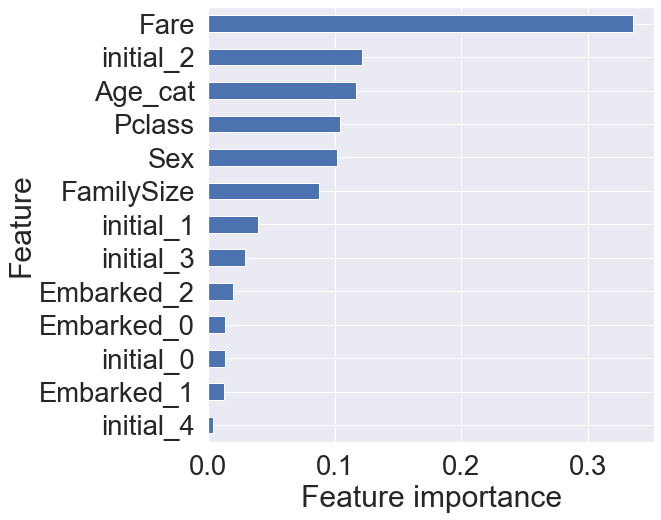

In [118]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [119]:
submission=pd.read_csv('gender_submission.csv')

In [120]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [121]:
prediction=model.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [122]:
submission['Survivied']=prediction

ValueError: Length of values does not match length of index

In [ ]:
submission.to_csv('my_first_submission.csv',index=False)